In [1]:
%load_ext autoreload
%autoreload 2

# ky

In [2]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)

from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from GENE_ML.gene_ml.converters.Tratio import Tratio
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config

config = Config(local=False)
parser = GENE_scan_parser(config)

#sampled_parameters = ['box-kymin', 'units-bref', 'units-nref', 'units-tref', 'nongene-Ti/Te', '_grp_species_1-omt', 'geometry-q0', 'species-omn'] #Geometry, Solver, x0,
#bounds = [(0.05,1), (2,4), (0.0001,10), (0.0001,4), (0.5,1.75), (10,70), (3,6), (5,60)]
ky = ['box-kymin']
bounds = [(0.05,1)]
num_samples = 100
sampler = Grid(parameters=ky, num_samples=num_samples, bounds=bounds)


remote_save_name = "1D_ky"
ex_id = "1D_ky"
num_workers = 4
single_run_timelim = 600
single_run_simtimelim = 600
ky_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id=ex_id, single_run_timelim=single_run_timelim, single_run_simtimelim=single_run_simtimelim, num_workers=num_workers)

PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/runners/GENErunner.py:91: SyntaxWarning: invalid escape sequence '\d'
  sbatch_id = re.search('(?<![\d])\d{7}(?![\d])', out).group(0)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/runners/GENErunner.py:219: SyntaxWarning: invalid escape sequence '\d'
  batch_id = re.search('(?<![\d])\d{7}(?![\d])', out).group(0)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/parsers/GENEparser.py:391: SyntaxWarning: invalid escape sequence '\d'
  values = re.findall("(-?\d+\.\d+E[+-]?\d+)", l)#np.array(l.split('  ')"
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.dec

<class 'paramiko.sftp_file.SFTPFile'>


In [4]:
# ky_datagen.executor.pre_run_check()


EXECUTOR, PRINT_CHECK_PARAMETERS
 ----------------------------------------------------------------------------------------------------
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 25
THE ESTIMATED WALLTIME FOR RUN ex-1D_ky_batch-0 is 00-04:35:00, dd-hh-mm-ss TO RUN 25 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
REMOTE PROBLEM DIRECTORY DOES NOT EXIST, CREATING IT NOW: /project/project_462000451/gene/auto_prob_ex-1D_ky_batch-0
RESULT FROM COMMAND: b'set lib path in ./tools/scanscript\nset lib path in ./tools/scanscript\ncreated prob01\ncopied parameters\ncreated link to the GENE executable in the bin directory\n'
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
47 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


48 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## 

In [5]:
# ky_datagen.executor.start_runs()

EXECUTING BATCHES
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 25
THE ESTIMATED WALLTIME FOR RUN ex-1D_ky_batch-0 is 00-04:35:00, dd-hh-mm-ss TO RUN 25 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
47 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


48 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## Submit via: sbatch submit.cmd (parameters below can be overwritten by command line options)
#SBATCH -t 00-04:35:00  ## wallclock limit, dd-hh:mm:ss
#SBATCH -N 1                       # total number of nodes, 2 CPUs with 64 rank each
#SBATCH --ntasks=128      # 64 per CPU (i.e. 128 per node). Additional 2 hyperthreads disabled
#SBATCH --mem=0                    # Allocate all the memory on each node
#SBATCH -p standard    

In [3]:
ky_datagen.executor.local_backup()

In [14]:
ky_datagen.executor.check_finished()


CHECKING IF JOBS FINISHED: ['8215680', '8215681', '8215682', '8215683']
NONE OF THE INPUTED SBATCH IDs ARE RUNNING


EXECUTOR, CHECK FINISHED True


True

In [3]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
ky_dataset = ScanData2(config, 'code_debug_tester',  parser=parser, remote_save_dir=ky_datagen.remote_save_dir, split_ratio=[0.1,0,0.9])#[tr,val,te]
ky_dataset.df

<class 'paramiko.sftp_file.SFTPFile'>


TypeError: ScanData2.__init__() got an unexpected keyword argument 'remote_save_dir'

Text(0, 0.5, 'growthrate')

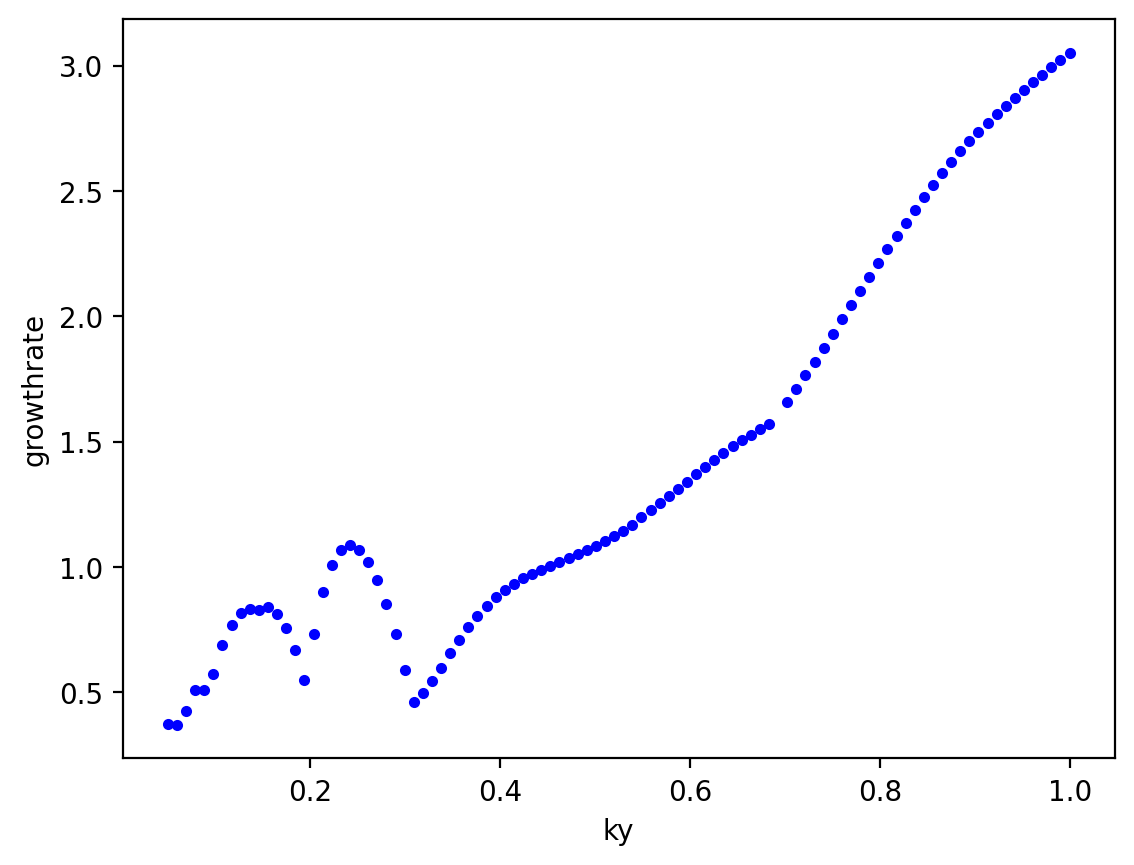

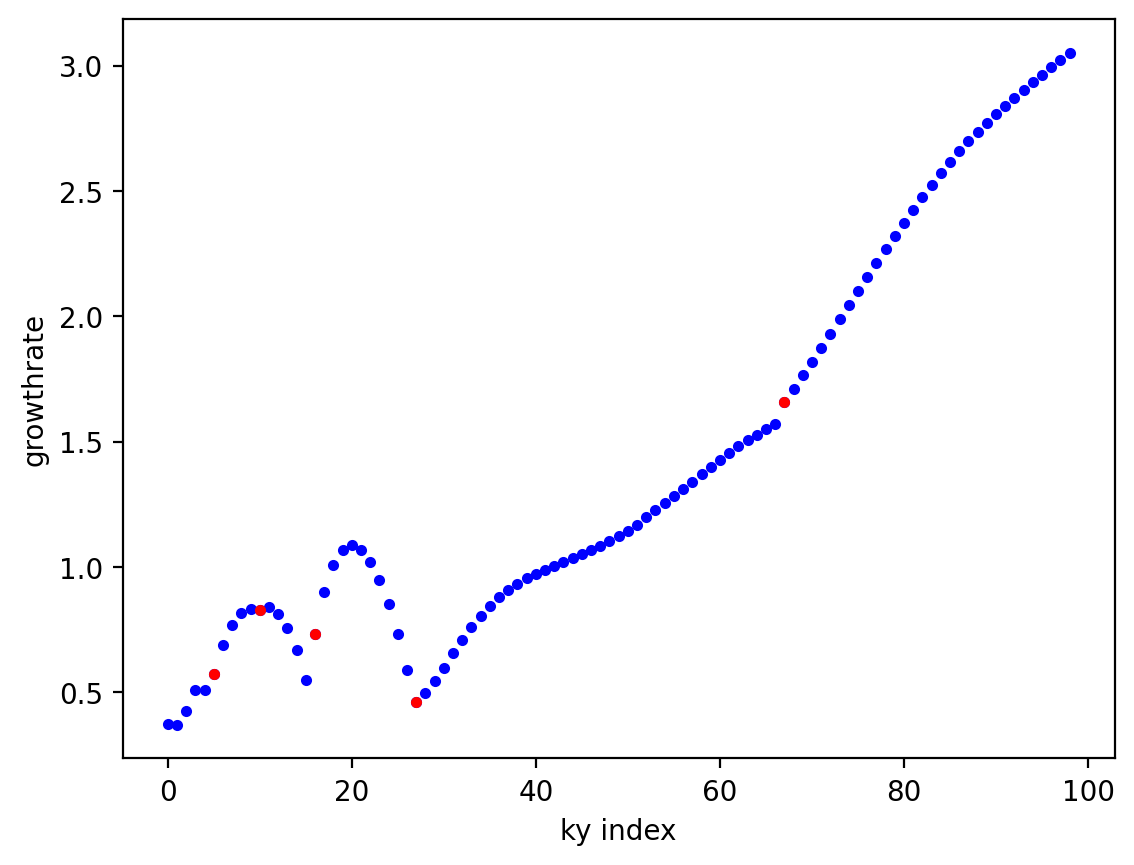

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=200)
ky = [x[0] for x in ky_dataset.x]
plt.plot(ky,ky_dataset.growthrates, '.b')
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.figure(dpi=200)
plt.plot(np.arange(len(ky_dataset.growthrates)), ky_dataset.growthrates, '.b')
plt.plot([27], ky_dataset.growthrates[27], '.r')
plt.plot([67], ky_dataset.growthrates[67], '.r')
plt.plot([5], ky_dataset.growthrates[5], '.r')
plt.plot([10], ky_dataset.growthrates[10], '.r')
plt.plot([16], ky_dataset.growthrates[16], '.r')


plt.xlabel('ky index')
plt.ylabel('growthrate')

In [22]:
from GENE_ML.gene_ml.tools import save_pkl
save_pkl('linear_data/ky', ky_dataset.df)

In [7]:
# from GENE_ML.gene_ml.models.XGBoost import XGBoost
# from GENE_ML.gene_ml.results.results import Results

# xgb_ky = XGBoost()
# xgb_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
# results_xgb_ky = Results('results_xgb_ky_rational_quadratic')
# results_xgb_ky.growthrate_predict_seen = xgb_ky.predict(ky_dataset.x_train)
# results_xgb_ky.growthrate_predict_unseen = xgb_ky.predict(ky_dataset.x_test)


# Low Train Data, RBF vs Matern vs Rational Quadratic

In [1]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config(local=True)

parser = GENE_scan_parser(config)
ky_dataset = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir='/home/djdaniel/DEEPlasma/vault/1D_ky', split_ratio=[0.1,0,0.9])#[tr,val,te]
ky_dataset.df

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/parsers/GENEparser.py:391: SyntaxWarning: invalid escape sequence '\d'
  values = re.findall("(-?\d+\.\d+E[+-]?\d+)", l)#np.array(l.split('  ')"
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from

Initialising dataset
HIT SIM LIMIT TEST ON FILE: /home/djdaniel/DEEPlasma/vault/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering time loop ***

hstlt, len stat and run_count 11 11
lin

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


,kymin1,growthrate,frequency,run_time,termination_reason,fingerprint,ratio_iheat_eheat,ratio_eparticle_eheat,particle_diff_i,heat_diff_i,...,particle_flux_e,heat_flux_e,particle_electrostatic_1,particle_electromagnetic_1,heat_electrostatic_1,heat_electromagnetic_1,particle_electrostatic_2,particle_electromagnetic_2,heat_electrostatic_2,heat_electromagnetic_2
0,0.050000,0.3720,0.1360,58.226,growthrate_converged,None,0.013076,0.053690,1.391137e+09,3.388082e+08,...,2.928710e+11,1.451580e+13,2.760800e+11,1.679100e+10,1.157400e+12,5.672600e+10,2.760800e+11,1.679100e+10,4.466800e+12,1.004900e+13
1,0.059596,0.3700,-0.0590,68.534,growthrate_converged,None,0.010539,0.044453,6.590102e+12,1.562408e+12,...,1.387390e+15,8.218700e+16,1.283100e+15,1.042900e+14,5.352200e+15,3.709900e+14,1.283100e+15,1.042900e+14,2.723200e+16,5.495500e+16
2,0.069192,0.4260,0.1230,41.290,growthrate_converged,None,0.013015,0.051824,1.299904e+07,3.264570e+06,...,2.736640e+09,1.402270e+11,2.526000e+09,2.106400e+08,1.065900e+10,7.517500e+08,2.526000e+09,2.106400e+08,3.564700e+10,1.045800e+11
3,0.078788,0.5100,-0.1060,42.205,growthrate_converged,None,0.012960,0.051872,1.239802e+10,3.097600e+09,...,2.610110e+12,1.336270e+14,2.391900e+12,2.182100e+11,1.008600e+13,7.864900e+11,2.391900e+12,2.182100e+11,3.759100e+13,9.603600e+13
4,0.088384,0.5080,-0.2770,64.907,growthrate_converged,None,0.012253,0.048500,8.095615e+19,2.045241e+19,...,1.704340e+22,9.296600e+23,1.550700e+22,1.536400e+21,6.556100e+22,5.584200e+21,1.550700e+22,1.536400e+21,2.828000e+23,6.468600e+23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.961616,2.9350,0.1050,38.406,growthrate_converged,None,0.026201,-0.022418,-1.550410e+16,1.812010e+16,...,-3.264020e+18,3.542015e+20,-3.264300e+18,2.797400e+14,1.048500e+18,5.566400e+15,-3.264300e+18,2.797400e+14,3.532900e+20,9.114900e+17
96,0.971212,2.9640,0.0700,38.142,growthrate_converged,None,0.026744,-0.022961,-1.825897e+16,2.126760e+16,...,-3.843993e+18,4.070089e+20,-3.844300e+18,3.071000e+14,1.186800e+18,6.461000e+15,-3.844300e+18,3.071000e+14,4.059700e+20,1.038900e+18
97,0.980808,2.9940,0.0260,37.505,growthrate_converged,None,0.027200,-0.023483,-2.523544e+16,2.922999e+16,...,-5.312724e+18,5.496624e+20,-5.313100e+18,3.759400e+14,1.531500e+18,8.688700e+15,-5.313100e+18,3.759400e+14,5.482700e+20,1.392400e+18
98,0.990404,3.0230,-0.0100,37.795,growthrate_converged,None,0.027624,-0.023960,-2.872920e+16,3.312177e+16,...,-6.048253e+18,6.129215e+20,-6.048600e+18,3.473300e+14,1.640700e+18,9.468600e+15,-6.048600e+18,3.473300e+14,6.113800e+20,1.541500e+18


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:56: SyntaxWarning: invalid escape sequence '\G'
<>:65: SyntaxWarning: invalid escape sequence '\G'
<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:76: SyntaxWarning: invalid escape sequence '\G'
<>:76: SyntaxWarning: invalid escape sequence '\G'
<>:93: SyntaxWarning: invalid escape sequence '\G'
<>:93: SyntaxWarning: invalid escape sequence '\G'
<>:96: SyntaxWarning: invalid escape sequence '\G'
<>:96: SyntaxWarning: invalid escape sequence '\G'
<>:112: SyntaxWarning: invalid escape sequence '\G'
<>:112: SyntaxWarning: invalid escape sequence '\G'
<>:115: SyntaxWarning: invalid escape sequence '\G'
<>:115: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid e

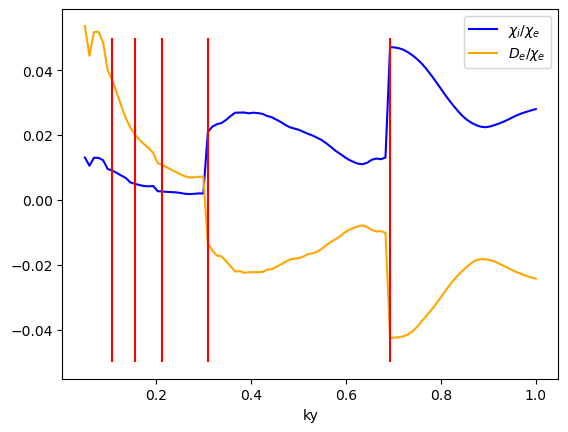

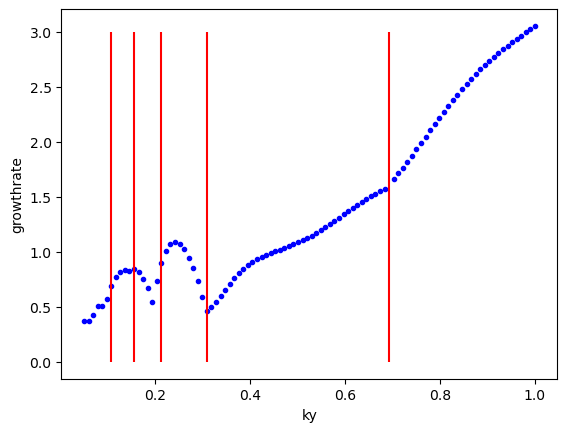

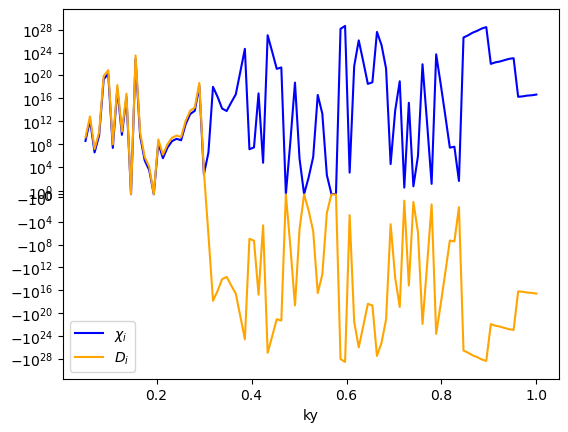

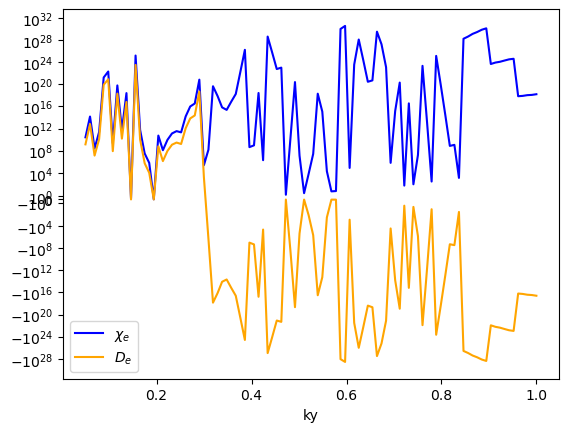

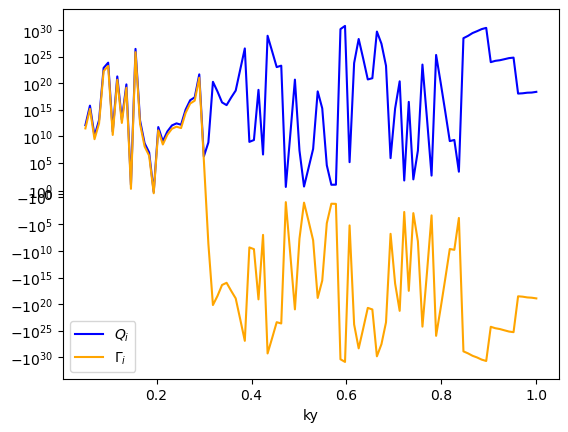

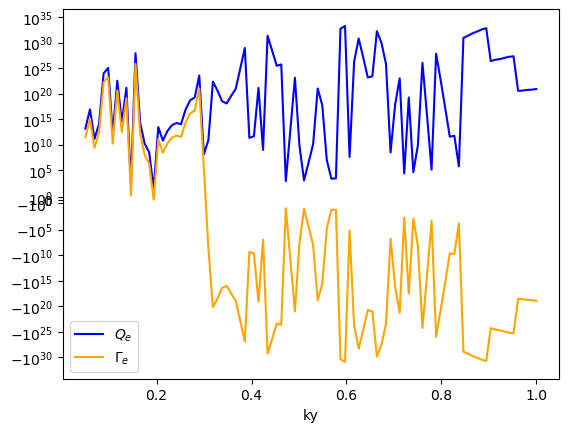

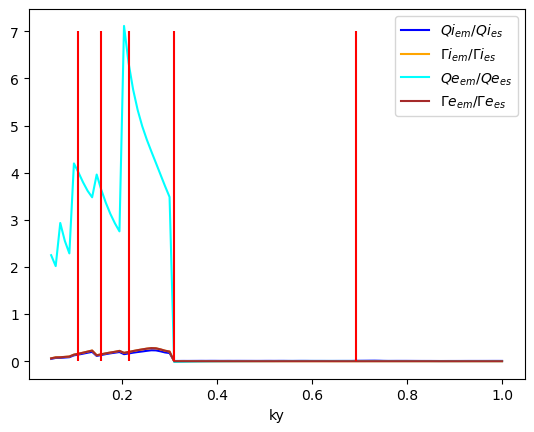

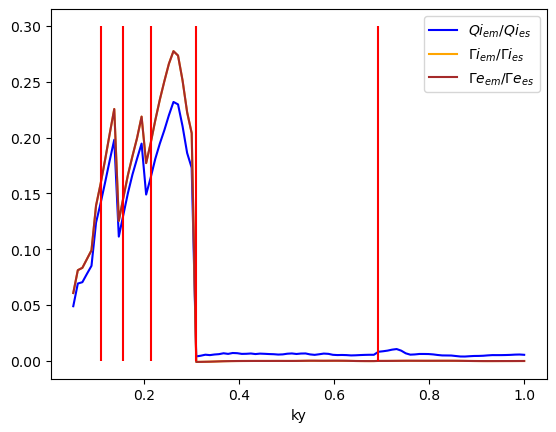

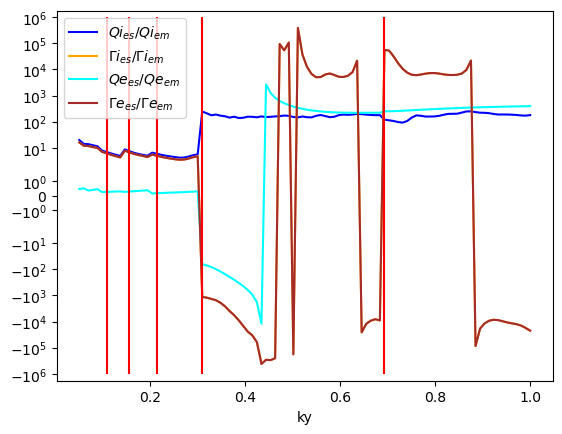

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['ratio_iheat_eheat'], 'b',label=f'$\chi_i/ \chi_e$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['ratio_eparticle_eheat'], 'orange', label=f'$D_e/ \chi_e$')
plt.vlines(ky_dataset.df['kymin1'][6], -0.05,0.05, 'r')
plt.vlines(ky_dataset.df['kymin1'][11], -0.05,0.05, 'r')
plt.vlines(ky_dataset.df['kymin1'][17], -0.05,0.05, 'r')
plt.vlines(ky_dataset.df['kymin1'][27], -0.05,0.05, 'r')
plt.vlines(ky_dataset.df['kymin1'][67], -0.05,0.05, 'r')

# plt.plot([27], ky_dataset.growthrates[27], '.r')
# plt.plot([67], ky_dataset.growthrates[67], '.r')
# plt.plot([5], ky_dataset.growthrates[5], '.r')
# plt.plot([10], ky_dataset.growthrates[10], '.r')
# plt.plot([16], ky_dataset.growthrates[16], '.r')

plt.xlabel('ky')
plt.legend()
plt.show()


plt.figure()
plt.plot(ky_dataset.df['kymin1'].to_numpy().astype('float'),ky_dataset.df['growthrate'].to_numpy().astype('float'), '.b')
plt.xlabel('ky')
plt.ylabel('growthrate')
low = 0
high = 3
plt.vlines(ky_dataset.df['kymin1'][6], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][11], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][17], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][27], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][67], low,high, 'r')
plt.show()


##################
plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_diff_i'], 'b',label=f'$\chi_i$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_diff_i'], 'orange',  label=f'$D_i$')
plt.yscale('symlog')
plt.xlabel('ky')
plt.legend()
plt.show()

plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_diff_e'], 'b', label=f'$\chi_e$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_diff_e'], 'orange',  label=f'$D_e$')
plt.yscale('symlog')
plt.xlabel('ky')
plt.legend()
plt.show()

plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_flux_i'], 'b', label=f'$Q_i$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_flux_i'], 'orange', label=f'$\Gamma_i$')
plt.yscale('symlog')
plt.xlabel('ky')
plt.legend()
plt.show()


plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_flux_e'], 'b', label=f'$Q_e$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_flux_e'], 'orange', label=f'$\Gamma_e$')
plt.yscale('symlog')
plt.xlabel('ky')
plt.legend()
plt.show()
#########################################
plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_electromagnetic_1'] / ky_dataset.df['heat_electrostatic_1'], 'b', label=f'$Q i_{{em}} / Q i_{{es}}$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_electromagnetic_1'] / ky_dataset.df['particle_electrostatic_1'], 'orange', label=f'$\Gamma i_{{em}} / \Gamma i_{{es}}$')

plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_electromagnetic_2'] / ky_dataset.df['heat_electrostatic_2'], 'cyan', label=f'$Q e_{{em}} / Q e_{{es}}$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_electromagnetic_2'] / ky_dataset.df['particle_electrostatic_2'], 'brown', label=f'$\Gamma e_{{em}} / \Gamma e_{{es}}$')
low = 0
high = 7
plt.vlines(ky_dataset.df['kymin1'][6], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][11], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][17], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][27], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][67], low,high, 'r')
# plt.yscale('symlog')
plt.xlabel('ky')
plt.legend()
plt.show()



plt.figure()
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_electromagnetic_1'] / ky_dataset.df['heat_electrostatic_1'], 'b', label=f'$Q i_{{em}} / Q i_{{es}}$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_electromagnetic_1'] / ky_dataset.df['particle_electrostatic_1'], 'orange', label=f'$\Gamma i_{{em}} / \Gamma i_{{es}}$')

# plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['heat_electromagnetic_2'] / ky_dataset.df['heat_electrostatic_2'], 'cyan', label=f'$Q e_{{em}} / Q e_{{es}}$')
plt.plot(ky_dataset.df['kymin1'],ky_dataset.df['particle_electromagnetic_2'] / ky_dataset.df['particle_electrostatic_2'], 'brown', label=f'$\Gamma e_{{em}} / \Gamma e_{{es}}$')
low = 0
high = 0.3
plt.vlines(ky_dataset.df['kymin1'][6], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][11], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][17], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][27], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][67], low,high, 'r')
# plt.yscale('symlog')
plt.xlabel('ky')
plt.legend()
plt.show()


plt.figure()
plt.plot(ky_dataset.df['kymin1'],1/(ky_dataset.df['heat_electromagnetic_1'] / ky_dataset.df['heat_electrostatic_1']), 'b', label=f'$Q i_{{es}} / Q i_{{em}}$')
plt.plot(ky_dataset.df['kymin1'],1/(ky_dataset.df['particle_electromagnetic_1'] / ky_dataset.df['particle_electrostatic_1']), 'orange', label=f'$\Gamma i_{{es}} / \Gamma i_{{em}}$')

plt.plot(ky_dataset.df['kymin1'],1/(ky_dataset.df['heat_electromagnetic_2'] / ky_dataset.df['heat_electrostatic_2']), 'cyan', label=f'$Q e_{{es}} / Q e_{{em}}$')
plt.plot(ky_dataset.df['kymin1'],1/(ky_dataset.df['particle_electromagnetic_2'] / ky_dataset.df['particle_electrostatic_2']), 'brown', label=f'$\Gamma e_{{es}} / \Gamma e_{{em}}$')
plt.yscale('symlog')
low = -10**6
high = 10**6
plt.vlines(ky_dataset.df['kymin1'][6], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][11], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][17], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][27], low,high, 'r')
plt.vlines(ky_dataset.df['kymin1'][67], low,high, 'r')
plt.xlabel('ky')
plt.legend()
plt.show()



In [29]:
df = ky_dataset.df[['particle_electrostatic_2', 'particle_electromagnetic_2', 'particle_flux_e']]
print(df.iloc[25:50])

    particle_electrostatic_2  particle_electromagnetic_2  particle_flux_e
25              8.348400e+20                1.858900e+20     1.020730e+21
26              2.993900e+05                6.108600e+04     3.604760e+05
27             -4.290700e+08                3.738000e+05    -4.286962e+08
28             -1.446900e+20                1.189500e+17    -1.445710e+20
29             -2.784900e+18                2.049900e+15    -2.782850e+18
30             -2.439300e+16                1.596000e+13    -2.437704e+16
31             -9.389700e+15                4.923500e+12    -9.384776e+15
32             -3.034600e+17                1.160600e+14    -3.033439e+17
33             -8.133500e+18                2.059900e+15    -8.131440e+18
34             -7.474900e+22                1.312800e+19    -7.473587e+22
35             -7.888600e+26                8.920100e+22    -7.887708e+26
36             -2.066600e+09                1.412200e+05    -2.066459e+09
37             -4.330100e+09          

In [5]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
ky_dataset = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir=ky_datagen.remote_save_dir, split_ratio=[0.1,0,0.9])#[tr,val,te]
ky_dataset.df

KeyboardInterrupt: 

In [ ]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr', kernel_type='rational_quadratic')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)
    

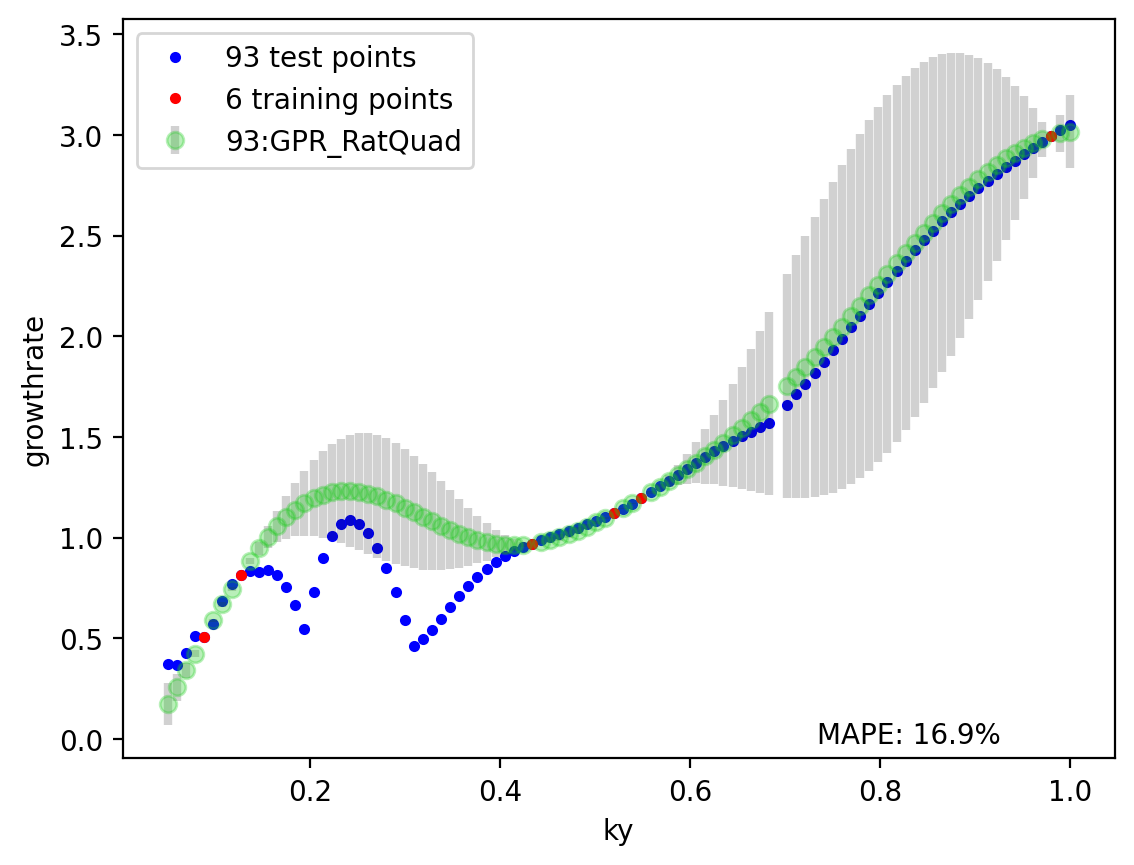

In [17]:
import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR_RatQuad')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_gpr_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)
    
plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 9.018175645470222
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = 4.488537499948474
Optimization restart 2/3, f = 4.488537499960664
Optimization restart 3/3, f = 4.488537499957717
RESULTING HYPERS:
 
Name : GP regression
Objective : 4.488537499948474
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  Mat32.variance           |     5.55

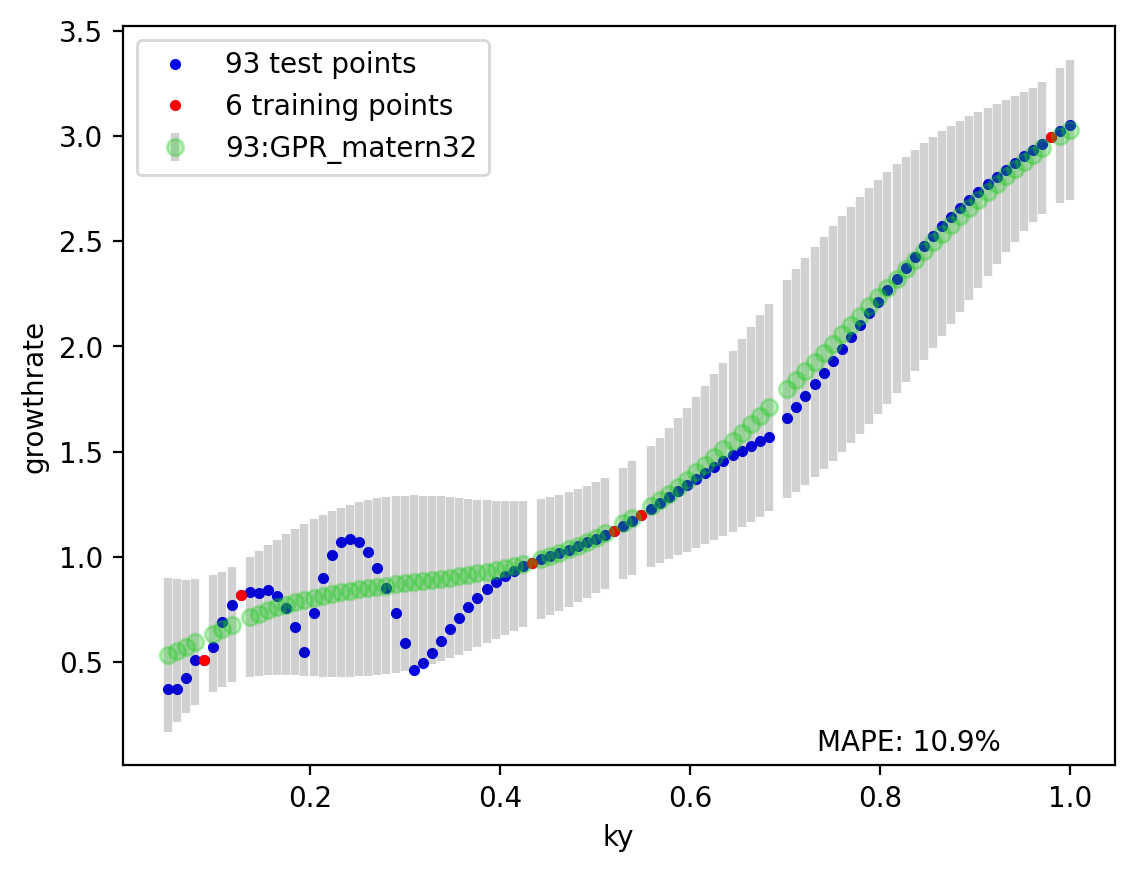

In [18]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr', kernel_type='matern32')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky_matern32')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR_matern32')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_gpr_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)
    
plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
    
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()
    

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 8.964701571184868
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = 4.768943182316503
Optimization restart 2/3, f = 4.749724574594384
Optimization restart 3/3, f = 4.749724574524377
RESULTING HYPERS:
 
Name : GP regression
Objective : 4.749724574524377
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |     4.666

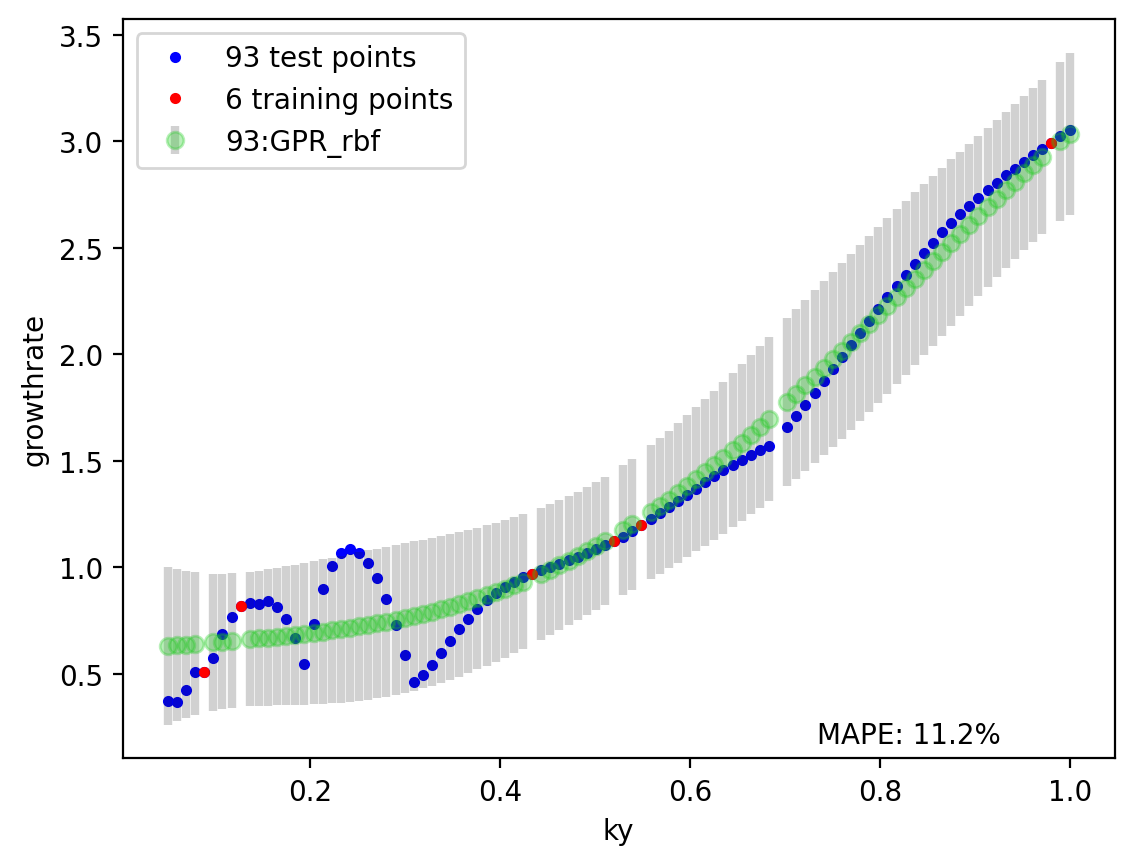

In [19]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr', kernel_type='radial_basis_function')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky_radial_basis_function')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR_rbf')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_gpr_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)
    
plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
    
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()



    

# High Train Data, RBF vs Matern vs Rational Quadratic

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
DEBUG, PATHS /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/scan.log /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstl

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Optimization restart 1/3, f = -64.5198647354335
Optimization restart 2/3, f = -64.51985096126887
Optimization restart 3/3, f = -64.51986462551238
RESULTING HYPERS:
 
Name : GP regression
Objective : -64.5198647354335
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  RatQuad.variance         |      3.727642812145643  |      +ve      |        
  RatQuad.lengthscale      |   0.041162955833491256  |      +ve      |        
  RatQuad.power            |   0.022727909449321886  |      +ve      |        
  Gaussian_noise.variance  |  2.874835858331451e-26  |      +ve      |        
GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 48.34226141895373
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Paramete

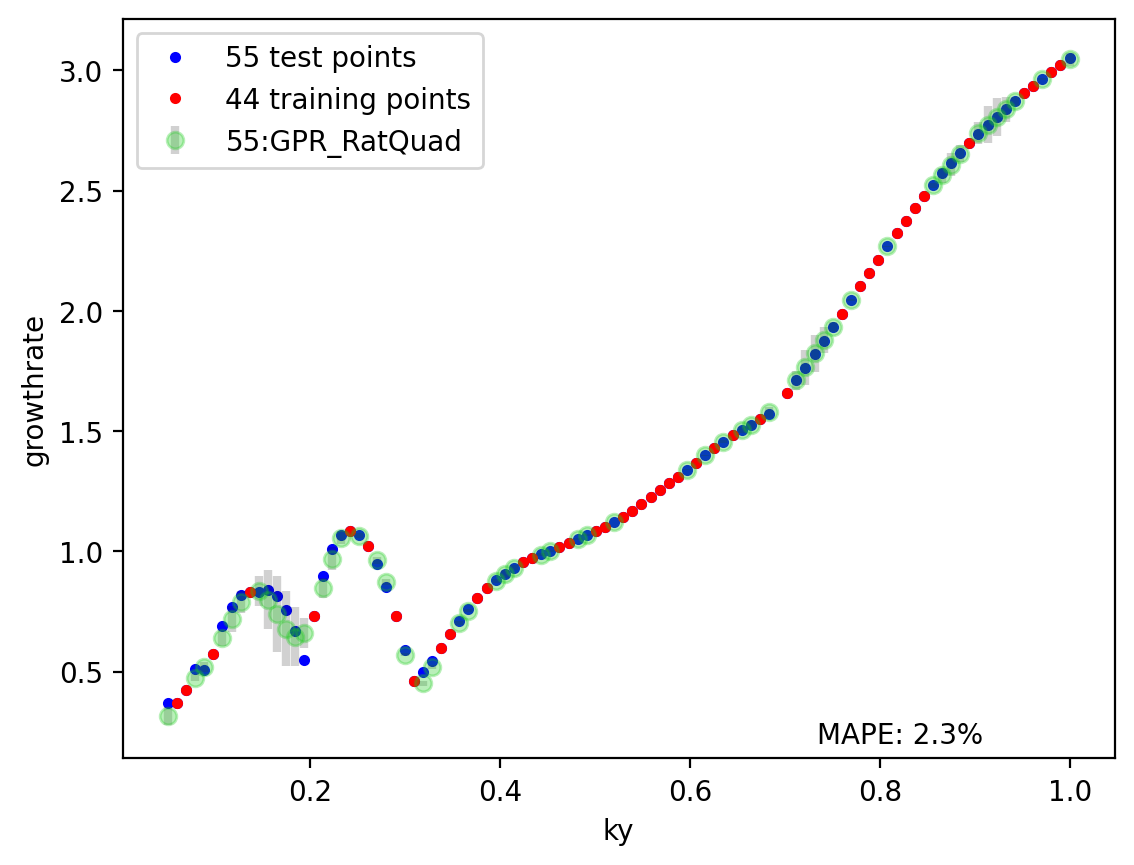

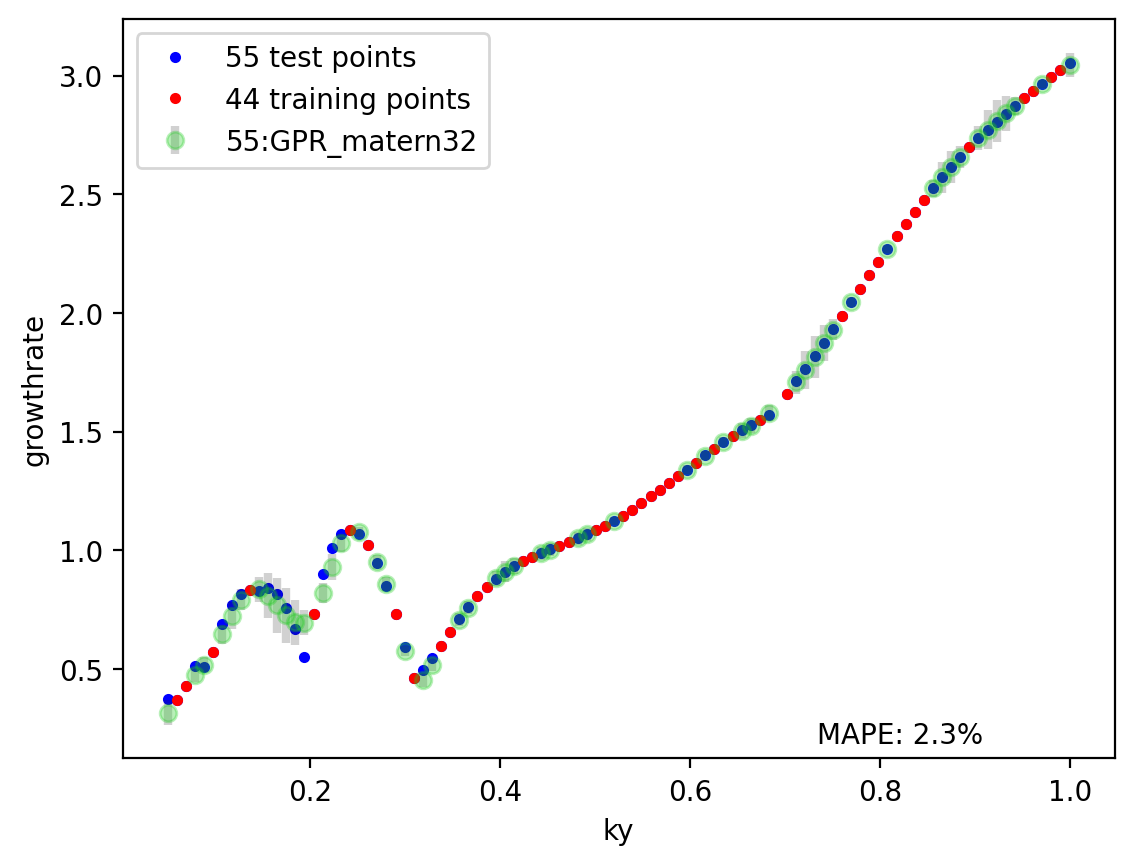

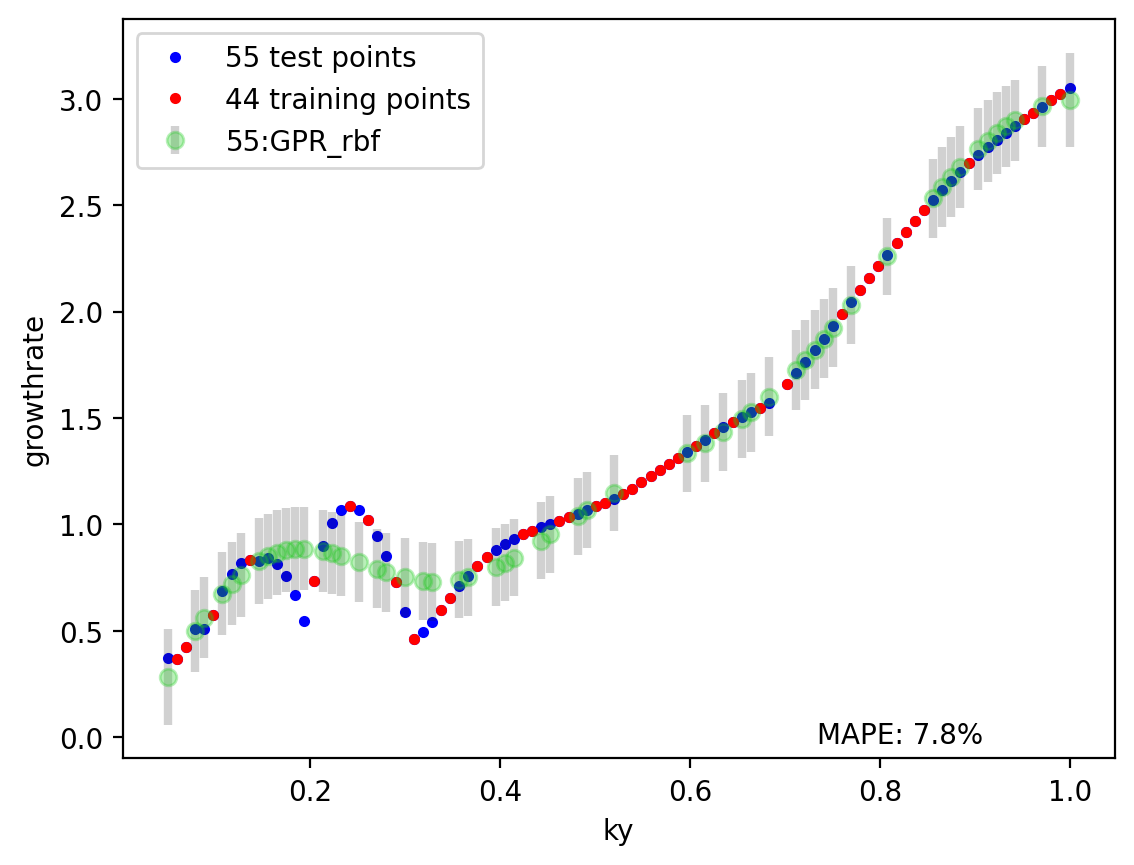

In [21]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
ky_dataset = ScanData2(config, 'code_debug_tester',  parser=parser, remote_save_dir=ky_datagen.remote_save_dir, split_ratio=[0.5,0,0.5], random_state=47)#[tr,val,te]
ky_dataset.df

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr', kernel_type='rational_quadratic')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

############################

import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR_RatQuad')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_gpr_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)
    
plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()

############################

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr', kernel_type='matern32')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky_matern32')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR_matern32')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_gpr_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)
    
plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
    
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()
    
##############################

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr', kernel_type='radial_basis_function')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky_radial_basis_function')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR_rbf')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_gpr_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)
    
plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
    
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()



    
    

# NN High Data

In [28]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config(local=True)

parser = GENE_scan_parser(config)
ky_dataset = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir='/home/djdaniel/DEEPlasma/vault/1D_ky', split_ratio=[0.9,0,0.1], random_state=47)#[tr,val,te]
ky_dataset.df

Initialising dataset
HIT SIM LIMIT TEST ON FILE: /home/djdaniel/DEEPlasma/vault/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering time loop ***

hstlt, len stat and run_count 11 11
lin

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


,kymin1,growthrate,frequency,run_time,termination_reason,fingerprint,ratio_iheat_eheat,ratio_eparticle_eheat
0,0.050000,0.3720,0.1360,58.226,growthrate_converged,None,0.001890,0.007261
1,0.059596,0.3700,-0.0590,68.534,growthrate_converged,None,0.001883,0.006946
2,0.069192,0.4260,0.1230,41.290,growthrate_converged,None,0.012253,0.048500
3,0.078788,0.5100,-0.1060,42.205,growthrate_converged,None,0.008317,0.032999
4,0.088384,0.5080,-0.2770,64.907,growthrate_converged,None,0.012960,0.051872
...,...,...,...,...,...,...,...,...
95,0.961616,2.9350,0.1050,38.406,growthrate_converged,None,0.023612,-0.019703
96,0.971212,2.9640,0.0700,38.142,growthrate_converged,None,0.024179,-0.020391
97,0.980808,2.9940,0.0260,37.505,growthrate_converged,None,0.024598,-0.020478
98,0.990404,3.0230,-0.0100,37.795,growthrate_converged,None,0.028920,-0.024674


--------------------------------
Epoch 1: loss=2.486022, val_loss=1.420388


--------------------------------
Epoch 2: loss=2.343750, val_loss=1.309617


--------------------------------
Epoch 3: loss=2.209278, val_loss=1.183873


--------------------------------
Epoch 4: loss=2.054601, val_loss=1.035353


--------------------------------
Epoch 5: loss=1.868756, val_loss=0.829906


--------------------------------
Epoch 6: loss=1.605088, val_loss=0.552437


--------------------------------
Epoch 7: loss=1.227439, val_loss=0.283344


--------------------------------
Epoch 8: loss=0.780803, val_loss=0.627709


--------------------------------
Epoch 9: loss=0.806480, val_loss=0.879220


--------------------------------
Epoch 10: loss=0.985604, val_loss=0.497657


--------------------------------
Epoch 11: loss=0.722833, val_loss=0.289326


--------------------------------
Epoch 12: loss=0.647748, val_loss=0.261777


--------------------------------
Epoch 13: loss=0.708928, val_loss=0.2780

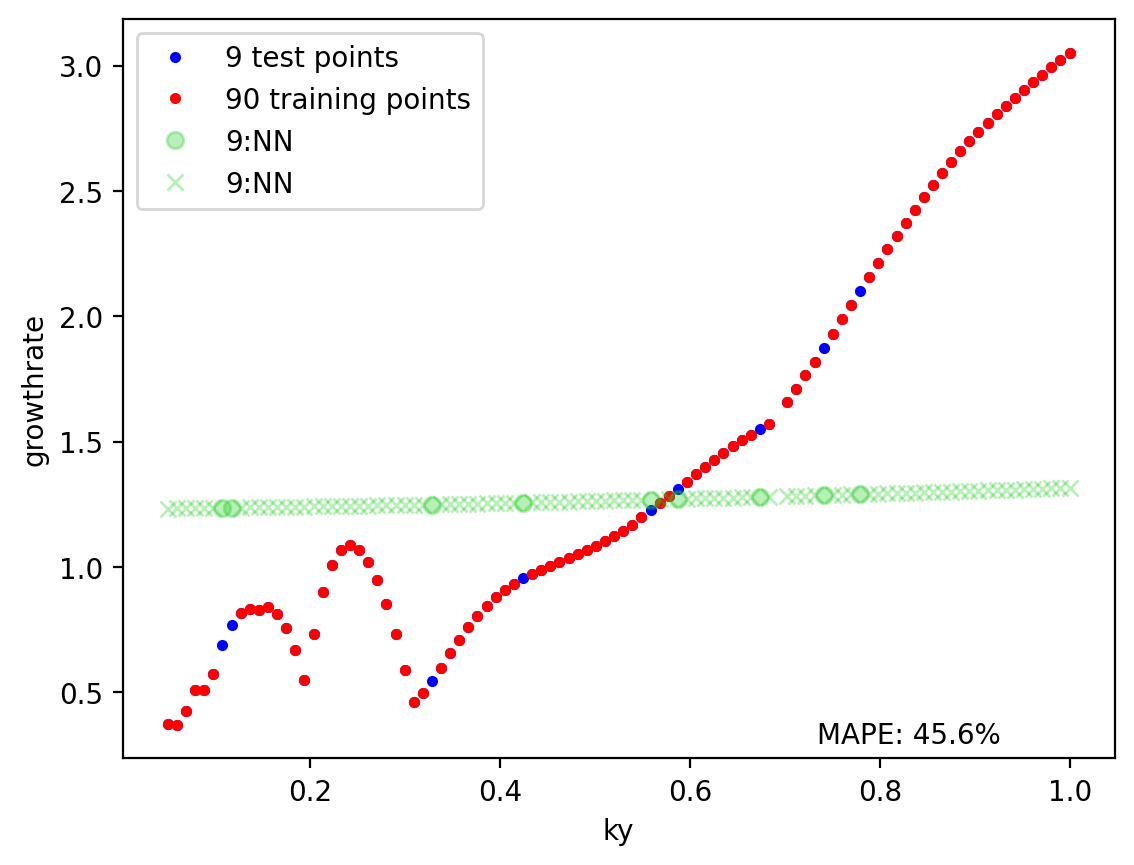

In [32]:
from GENE_ML.gene_ml.models.NN import NN
from GENE_ML.gene_ml.results.results import Results
import numpy as np

nn_ky = NN(n_inputs=1, n_layers=5, n_neurons_per_layer=100)
nn_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train, x_val=ky_dataset.x_test, y_val=ky_dataset.growthrate_test, batch_percentage=100, n_epochs=10000)
results_nn_ky = Results('results_gpr_ky_radial_basis_function')
results_nn_ky.growthrate_predict_seen = nn_ky.predict(ky_dataset.x_train)
results_nn_ky.growthrate_predict_unseen = nn_ky.predict(ky_dataset.x_test)

import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.plot(ky_test, results_nn_ky.growthrate_predict_unseen, 'o', color=[0.1,0.8,0.1,0.3], label=f'{len(ky_test)}:NN')
plt.plot(ky_train, results_nn_ky.growthrate_predict_seen, 'x', color=[0.1,0.8,0.1,0.3], label=f'{len(ky_test)}:NN')

# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
mape = np.mean(np.abs(ky_dataset.growthrate_test-results_nn_ky.growthrate_predict_unseen)*100/ky_dataset.growthrate_test)

plt.annotate(text=f'MAPE: {np.round(mape,1)}%', xy=(.7, .02), xycoords='axes fraction', fontsize=None)
    
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()

# Manually splitting the humps

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
End of SCAN DATA init
Initialising dataset
End of SCAN DATA init
Initialising dataset
End of SCAN DATA init
GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 10.741227267354196
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -14.133343636407258
Optimization restart 2/3, f = -14.133343636202877
Optimization restart 3/3, f = -14.133343636419427
RESULTING HYPERS:
 
Name : GP regression
Objective : -14.133343636419427
Number of Parameters : 3
Numb

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


CURRENT HYPERS:
 
Name : GP regression
Objective : 42.36623893934312
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -61.82366546071066
Optimization restart 2/3, f = -61.82366546038581
Optimization restart 3/3, f = -61.823665459979736
RESULTING HYPERS:
 
Name : GP regression
Objective : -61.82366546071066
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     3.2224490589396377  |      +ve      |        
  rbf.lengthscale          |     0.3332180653531946  |      +ve      |        
  Gaussian_noise

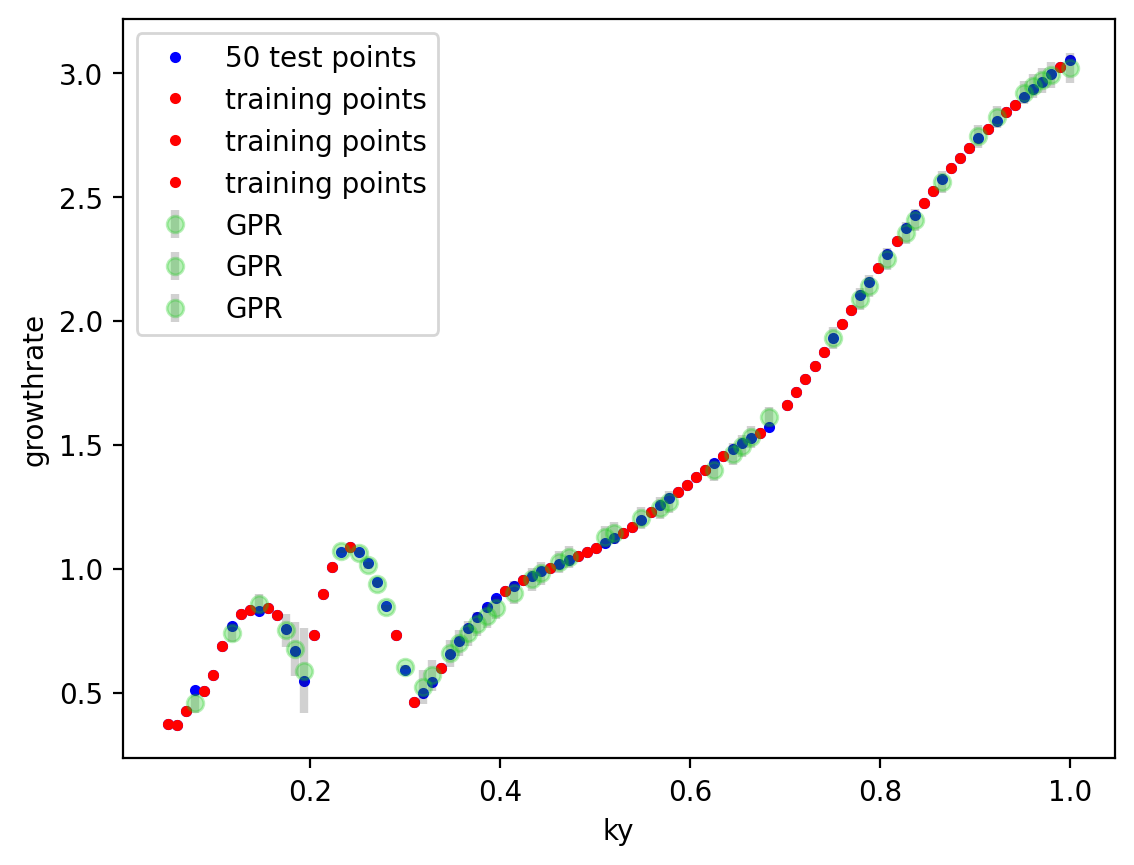

In [12]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
config = Config()

plt.figure(dpi=200)
ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]

plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')

c1 = 16
c2 = 28

inst1 = ScanData2(config)
inst1.split_ratio = [0.5,0,0.5] #tr val te
inst1.set_from_df(ky_dataset.df[0:c1], rest_df_ncol=2)

inst2 = ScanData2(config)
inst2.split_ratio = [0.5,0,0.5]
inst2.set_from_df(ky_dataset.df[c1:c2], rest_df_ncol=2)

inst3 = ScanData2(config)
inst3.split_ratio = [0.5,0,0.5]
inst3.set_from_df(ky_dataset.df[c2:], rest_df_ncol=2)

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

inst = [inst1,inst2,inst3]
gpr = [GPR('gpr') for i in range(3)]
results = [Results('results') for i in range(3)]
for g, res, dset in zip(gpr, results, inst):
    g.fit(dset.x_train, dset.growthrate_train)
    res.growthrate_predict_seen, res.growthrate_predict_seen_errors = g.predict(dset.x_train)
    res.growthrate_predict_unseen, res.growthrate_predict_unseen_errors = g.predict(dset.x_test)

for res, dset in zip(results, inst):
    ky = [x[0] for x in dset.x]
    ky_train = [x[0] for x in dset.x_train]
    ky_test = [x[0] for x in dset.x_test]
    plt.plot(ky_train, dset.growthrate_train, '.r', label=f'training points')
    plt.errorbar(ky_test, res.growthrate_predict_unseen, yerr=res.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'GPR')

# plt.plot(ky[0:c1], ky_dataset.growthrates[0:c1], '.r', label=f'{len(ky)} GENE points')
# plt.plot(ky[c1:c2], ky_dataset.growthrates[c1:c2], '.g', label=f'{len(ky)} GENE points')

plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()






In [46]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
ky_dataset = ScanData2('code_debug_tester',  parser=parser, config=config, remote_save_dir=ky_datagen.remote_save_dir, split_ratio=[0.7,0,0.3])#[tr,val,te]
ky_dataset.df

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

from GENE_ML.gene_ml.models.XGBoost import XGBoost
from GENE_ML.gene_ml.results.results import Results

xgb_ky = XGBoost()
xgb_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_xgb_ky = Results('results_xgb_ky')
results_xgb_ky.growthrate_predict_seen = xgb_ky.predict(ky_dataset.x_train)
results_xgb_ky.growthrate_predict_unseen = xgb_ky.predict(ky_dataset.x_test)

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
DEBUG, PATHS /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/scan.log /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstl

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:350: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CURRENT HYPERS:
 
Name : GP regression
Objective : 88.12190407491005
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -40.93064987109857
Optimization restart 2/3, f = -83.72256134351352
Optimization restart 3/3, f = -83.72256134359887
RESULTING HYPERS:
 
Name : GP regression
Objective : -83.72256134359887
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     1.5102452345033746  |      +ve      |        
  rbf.lengthscale          |    0.06400020548499427  |      +ve      |        
  Gaussian_noise.

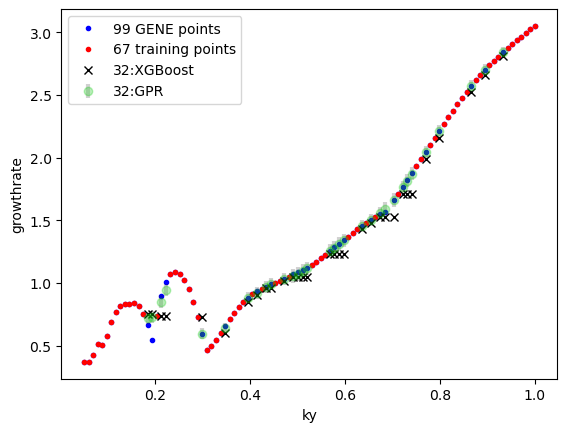

In [47]:

import matplotlib.pyplot as plt

fig_ky = plt.figure()

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)} GENE points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR')
plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()

# omn

In [ ]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)

from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from GENE_ML.gene_ml.converters.Tratio import Tratio
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config

config = Config(local=False)
parser = GENE_scan_parser(config)

#sampled_parameters = ['box-kymin', 'units-bref', 'units-nref', 'units-tref', 'nongene-Ti/Te', '_grp_species_1-omt', 'geometry-q0', 'species-omn'] #Geometry, Solver, x0,
#bounds = [(0.05,1), (2,4), (0.0001,10), (0.0001,4), (0.5,1.75), (10,70), (3,6), (5,60)]
ky = ['box-kymin']
bounds = [(0.05,1)]
num_samples = 100
sampler = Grid(parameters=ky, num_samples=num_samples, bounds=bounds)


remote_save_name = "1D_omn"
ex_id = "1D_omn"
num_workers = 4
single_run_timelim = 600
single_run_simtimelim = 600
omn_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id=ex_id, single_run_timelim=single_run_timelim, single_run_simtimelim=single_run_simtimelim, num_workers=num_workers)

In [ ]:
omn_datagen.executor.start_runs()

In [ ]:
omn_datagen.executor.check_finished()

In [ ]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
omn_dataset = ScanData2('code_debug_tester',  parser=parser, config=config, remote_save_dir=omn_datagen.remote_save_dir, split_ratio=[0.1,0,0.9])#[tr,val,te]

In [ ]:
omn_dataset.save('linear_data/omn')

# Ky 2

In [9]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)

from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from GENE_ML.gene_ml.converters.Tratio import Tratio
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
import numpy as np

config = Config(local=False)
parser = GENE_scan_parser(config)

#sampled_parameters = ['box-kymin', 'units-bref', 'units-nref', 'units-tref', 'nongene-Ti/Te', '_grp_species_1-omt', 'geometry-q0', 'species-omn'] #Geometry, Solver, x0,
bounds = [(0.05,1), (2,4), (0.0001,10), (0.0001,4), (0.5,1.75), (10,70), (3,6), (5,60)]

set_parameters = [('box','kymin'), ('units','bref'), ('units','nref'), ('units','tref'), ('nongene','Ti/Te'), ('_grp_species_1','omt'), ('geometry','q0'), ('species','omn')] #Geometry, Solver, x0,
set_values = {('box','kymin'):0.5, ('units','bref'):np.median(bounds[1]), ('units','nref'):np.median(bounds[2]), ('units','tref'):np.median(bounds[3]), ('nongene','Ti/Te'):np.median(bounds[4]), ('_grp_species_1','omt'):60, ('geometry','q0'):np.median(bounds[6]), ('species','omn'):50}
pre_convert = Tratio(parameters=set_parameters, samples=set_values, config=config, parser=parser)

# alter base parameters file to account for set_parameters and the conversion.
for param_key, value in pre_convert.samples.items():
    parser.alter_parameters_file(config.base_params_path, group_var=param_key, value=value)

ky = ['box-kymin']
bounds = [(0.05,2)]
num_samples = 200
sampler = Grid(parameters=ky, num_samples=num_samples, bounds=bounds)

remote_save_name = "1D_ky_high_grad"
ex_id = "1D_ky_high_grad"
num_workers = 4
single_run_timelim = 600
single_run_simtimelim = 600
ky_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id=ex_id, single_run_timelim=single_run_timelim, single_run_simtimelim=single_run_simtimelim, num_workers=num_workers)

PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/runners/GENErunner.py:91: SyntaxWarning: invalid escape sequence '\d'
  sbatch_id = re.search('(?<![\d])\d{7}(?![\d])', out).group(0)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/runners/GENErunner.py:219: SyntaxWarning: invalid escape sequence '\d'
  batch_id = re.search('(?<![\d])\d{7}(?![\d])', out).group(0)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/parsers/GENEparser.py:405: SyntaxWarning: invalid escape sequence '\d'
  values = re.findall("(-?\d+\.\d+E[+-]?\d+)", l)#np.array(l.split('  ')"
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.dec

<class 'paramiko.sftp_file.SFTPFile'>
gpv, paramater path /home/djdaniel/DEEPlasma/parameters_base_dependancies_fixed_dp
21 kymin 0.5
    kymin = 0.5

    kymin = 0.5

108 bref 3.0
    bref = 3.0

    bref = 3.0

107 nref 5.00005
    nref = 5.00005

    nref = 5.00005

106 tref 2.00005
    tref = 2.00005

    tref = 2.00005

63 q0 4.5
    q0 = 4.5

    q0 = 4.5

85 omn 50
    omn = 50

    omn = 50

95 omn 50
    omn = 50

    omn = 50

96 omt 60
    omt = 60

    omt = 60

88 temp 1.125
    temp = 1.125

    temp = 1.125

86 omt 67.50000000000001
    omt = 67.50000000000001

    omt = 67.50000000000001



In [24]:
# ky_datagen.executor.delete()

EXECUTOR DELETE
DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-0 temp/*ex-1D_ky_high_grad_batch-0


rm: cannot remove '/project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-0': No such file or directory
rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-0': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-1 temp/*ex-1D_ky_high_grad_batch-1


rm: cannot remove '/project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-1': No such file or directory
rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-1': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-2 temp/*ex-1D_ky_high_grad_batch-2


rm: cannot remove '/project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-2': No such file or directory
rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-2': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-3 temp/*ex-1D_ky_high_grad_batch-3


rm: cannot remove '/project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-3': No such file or directory
rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-3': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-4 temp/*ex-1D_ky_high_grad_batch-4


rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-4': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-5 temp/*ex-1D_ky_high_grad_batch-5


rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-5': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-6 temp/*ex-1D_ky_high_grad_batch-6


rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-6': No such file or directory


DELETING, /project/project_462000451/gene/auto_prob_ex-1D_ky_high_grad_batch-7 temp/*ex-1D_ky_high_grad_batch-7


rm: cannot remove 'temp/*ex-1D_ky_high_grad_batch-7': No such file or directory


DELETING, /scratch/project_462000451/gene_out/gene_auto/1D_ky_high_grad
EXECUTOR DELETING run_files


rm: cannot remove '/scratch/project_462000451/gene_out/gene_auto/1D_ky_high_grad': No such file or directory


In [5]:
ky_datagen.executor.pre_run_check()


EXECUTOR, PRINT_CHECK_PARAMETERS
 ----------------------------------------------------------------------------------------------------
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 50
THE ESTIMATED WALLTIME FOR RUN ex-1D_ky_high_grad_batch-0 is 00-09:10:00, dd-hh-mm-ss TO RUN 50 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
46 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


47 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## Submit via: sbatch submit.cmd (parameters below can be overwritten by command line options)
#SBATCH -t 00-09:10:00  ## wallclock limit, dd-hh:mm:ss
#SBATCH -N 1                       # total number of nodes, 2 CPUs with 64 rank each
#SBATCH --ntasks=128      # 64 per CPU (i.e. 128 per node). Addi

In [6]:
# ky_datagen.executor.start_runs()

EXECUTING BATCHES
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 50
THE ESTIMATED WALLTIME FOR RUN ex-1D_ky_high_grad_batch-0 is 00-09:10:00, dd-hh-mm-ss TO RUN 50 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
46 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


47 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## Submit via: sbatch submit.cmd (parameters below can be overwritten by command line options)
#SBATCH -t 00-09:10:00  ## wallclock limit, dd-hh:mm:ss
#SBATCH -N 1                       # total number of nodes, 2 CPUs with 64 rank each
#SBATCH --ntasks=128      # 64 per CPU (i.e. 128 per node). Additional 2 hyperthreads disabled
#SBATCH --mem=0                    # Allocate all the memory on each node
#SBATCH -p st

In [7]:
ky_datagen.executor.check_finished()


CHECKING IF JOBS FINISHED: ['8304262', '8304264', '8304265', '8304267']
FINISHED [False False False False]
RUNNING SBATCH IDs:  ['8304262' '8304264' '8304265' '8304267']


EXECUTOR, CHECK FINISHED False


False

In [8]:
ky_datagen.remote_save_dir

'/scratch/project_462000451/gene_out/gene_auto/1D_ky_high_grad'

In [3]:
ky_datagen.executor.local_backup()

In [3]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

remote_save_dir = '/scratch/project_462000451/gene_out/gene_auto/1D_ky_high_grad'
local_save_dir = '/home/djdaniel/DEEPlasma/vault/1D_ky_high_grad'
parser = GENE_scan_parser(config)
ky_dataset2 = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir=local_save_dir, split_ratio=[0.1,0,0.9])#[tr,val,te]
ky_dataset2.df

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
HIT SIM LIMIT TEST ON FILE: /home/djdaniel/DEEPlasma/vault/1D_ky_high_grad/ex-1D_ky_high_grad_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** enter

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


,kymin1,growthrate,frequency,run_time,termination_reason,fingerprint,ratio_iheat_eheat,ratio_eparticle_eheat,particle_diff_i,heat_diff_i,...,particle_flux_e,heat_flux_e,particle_electrostatic_1,particle_electromagnetic_1,heat_electrostatic_1,heat_electromagnetic_1,particle_electrostatic_2,particle_electromagnetic_2,heat_electrostatic_2,heat_electromagnetic_2
0,0.050000,0.5750,-0.3140,22.545,growthrate_converged,None,0.012082,0.057287,1.285053e+14,2.710111e+13,...,4.227190e+16,1.897820e+18,3.768300e+16,4.588900e+15,1.525900e+17,1.716100e+16,3.768300e+16,4.588900e+15,4.606200e+17,1.437200e+18
1,0.059799,0.7200,0.6680,17.211,growthrate_converged,None,0.010723,0.049078,8.387641e+13,1.832580e+13,...,2.759120e+16,1.432070e+18,2.398100e+16,3.610200e+15,9.780500e+16,1.362900e+16,2.398100e+16,3.610200e+15,3.688700e+17,1.063200e+18
2,0.069598,0.7130,0.3640,24.056,growthrate_converged,None,0.009530,0.041315,6.406736e+24,1.477773e+24,...,2.107500e+27,1.287500e+29,1.787900e+27,3.196000e+26,7.374500e+27,1.215100e+27,1.787900e+27,3.196000e+26,3.577100e+28,9.297900e+28
3,0.079397,0.7400,-0.4900,29.573,growthrate_converged,None,0.007716,0.040390,2.032204e+00,3.882287e-01,...,6.684950e+02,4.172900e+04,6.103600e+02,5.813500e+01,2.433900e+03,2.102500e+02,6.103600e+02,5.813500e+01,8.250000e+03,3.347900e+04
4,0.089196,0.8740,0.5180,11.827,growthrate_converged,None,0.006506,0.032938,4.554118e+08,8.995719e+07,...,1.498080e+11,1.136550e+13,1.330500e+11,1.675800e+10,5.338600e+11,6.164100e+10,1.330500e+11,1.675800e+10,2.332700e+12,9.032800e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.960804,3.2250,-0.2080,8.133,growthrate_converged,None,0.010163,-0.007143,-5.213802e+19,7.418260e+19,...,-1.715084e+22,5.711606e+24,-1.715200e+22,1.164500e+18,1.618300e+22,5.567600e+19,-1.715200e+22,1.164500e+18,5.698700e+24,1.290600e+22
196,1.970603,3.2650,-0.2280,8.378,growthrate_converged,None,0.009995,-0.007249,-3.050782e+19,4.206748e+19,...,-1.003557e+22,3.292633e+24,-1.003600e+22,4.329000e+17,8.132700e+21,3.077400e+19,-1.003600e+22,4.329000e+17,3.285200e+24,7.433000e+21
197,1.980402,3.3090,-0.2520,8.532,growthrate_converged,None,0.009913,-0.007078,-1.731381e+19,2.424805e+19,...,-5.695389e+21,1.914116e+24,-5.695400e+21,1.126400e+16,4.989800e+21,1.673700e+19,-5.695400e+21,1.126400e+16,1.909800e+24,4.316300e+21
198,1.990201,3.3560,-0.2810,8.411,growthrate_converged,None,0.009938,-0.006693,-1.430830e+19,2.124649e+19,...,-4.706724e+21,1.673770e+24,-4.706600e+21,-1.243100e+17,5.330300e+21,1.386800e+19,-4.706600e+21,-1.243100e+17,1.670000e+24,3.769700e+21


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:75: SyntaxWarning: invalid escape sequence '\G'
<>:75: SyntaxWarning: invalid escape sequence '\G'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:75: SyntaxWarning: invalid escape sequence '\G'
<>:75: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipykernel_239571/3643609126.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['ratio_iheat_eheat'], 'b',label=f'$\chi_i/ \chi_e$')
/tmp/ipykernel_239571/3643609126.py:12: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['ratio_eparticle_eheat'], 'orange', label=f'$D_e/ \chi_e$')
/tmp/

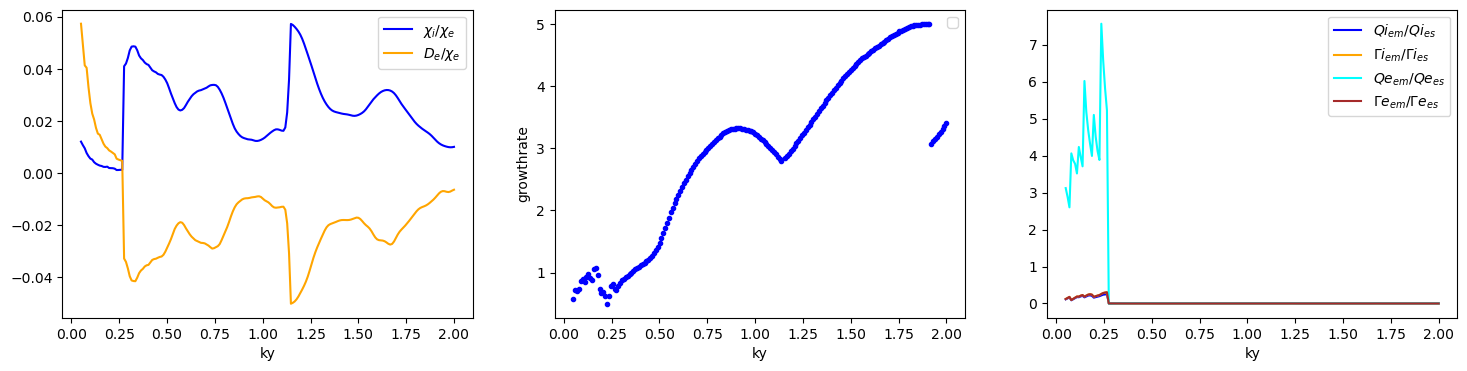

In [11]:
import numpy as np
import matplotlib.pyplot as plt

ncol = 3
nrow = 1
width = 6
height = 4

figure, [ax1, ax2, ax3] = plt.subplots(nrow, ncol, figsize=(ncol*width, nrow*height))

ax1.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['ratio_iheat_eheat'], 'b',label=f'$\chi_i/ \chi_e$')
ax1.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['ratio_eparticle_eheat'], 'orange', label=f'$D_e/ \chi_e$')
ax1.legend()

# plt.vlines(ky_dataset2.df['kymin1'][6], -0.05,0.05, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][11], -0.05,0.05, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][17], -0.05,0.05, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][27], -0.05,0.05, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][67], -0.05,0.05, 'r')

ax1.set_xlabel('ky')


ax2.plot(ky_dataset2.df['kymin1'].to_numpy().astype('float'),ky_dataset2.df['growthrate'].to_numpy().astype('float'), '.b')
ax2.set_xlabel('ky')
ax2.set_ylabel('growthrate')
ax2.legend()

low = 0
high = 3
# plt.vlines(ky_dataset2.df['kymin1'][6], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][11], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][17], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][27], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][67], low,high, 'r')


##################
# plt.figure()
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_diff_i'], 'b',label=f'$\chi_i$')
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_diff_i'], 'orange',  label=f'$D_i$')
# plt.yscale('symlog')
# plt.xlabel('ky')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_diff_e'], 'b', label=f'$\chi_e$')
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_diff_e'], 'orange',  label=f'$D_e$')
# plt.yscale('symlog')
# plt.xlabel('ky')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_flux_i'], 'b', label=f'$Q_i$')
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_flux_i'], 'orange', label=f'$\Gamma_i$')
# plt.yscale('symlog')
# plt.xlabel('ky')
# plt.legend()
# plt.show()


# plt.figure()
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_flux_e'], 'b', label=f'$Q_e$')
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_flux_e'], 'orange', label=f'$\Gamma_e$')
# plt.yscale('symlog')
# plt.xlabel('ky')
# plt.legend()
# plt.show()
#########################################
ax3.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_electromagnetic_1'] / ky_dataset2.df['heat_electrostatic_1'], 'b', label=f'$Q i_{{em}} / Q i_{{es}}$')
ax3.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_electromagnetic_1'] / ky_dataset2.df['particle_electrostatic_1'], 'orange', label=f'$\Gamma i_{{em}} / \Gamma i_{{es}}$')
ax3.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_electromagnetic_2'] / ky_dataset2.df['heat_electrostatic_2'], 'cyan', label=f'$Q e_{{em}} / Q e_{{es}}$')
ax3.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_electromagnetic_2'] / ky_dataset2.df['particle_electrostatic_2'], 'brown', label=f'$\Gamma e_{{em}} / \Gamma e_{{es}}$')
low = 0
high = 7
# plt.vlines(ky_dataset2.df['kymin1'][6], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][11], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][17], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][27], low,high, 'r')
# plt.vlines(ky_dataset2.df['kymin1'][67], low,high, 'r')
# plt.yscale('symlog')
ax3.set_xlabel('ky')
ax3.legend()
plt.show()




# plt.figure()
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_electromagnetic_1'] / ky_dataset2.df['heat_electrostatic_1'], 'b', label=f'$Q i_{{em}} / Q i_{{es}}$')
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_electromagnetic_1'] / ky_dataset2.df['particle_electrostatic_1'], 'orange', label=f'$\Gamma i_{{em}} / \Gamma i_{{es}}$')

# # plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['heat_electromagnetic_2'] / ky_dataset2.df['heat_electrostatic_2'], 'cyan', label=f'$Q e_{{em}} / Q e_{{es}}$')
# plt.plot(ky_dataset2.df['kymin1'],ky_dataset2.df['particle_electromagnetic_2'] / ky_dataset2.df['particle_electrostatic_2'], 'brown', label=f'$\Gamma e_{{em}} / \Gamma e_{{es}}$')
# low = 0
# high = 0.3
# # plt.vlines(ky_dataset2.df['kymin1'][6], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][11], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][17], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][27], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][67], low,high, 'r')
# # plt.yscale('symlog')
# plt.xlabel('ky')
# plt.legend()
# plt.show()


# plt.figure()
# plt.plot(ky_dataset2.df['kymin1'],1/(ky_dataset2.df['heat_electromagnetic_1'] / ky_dataset2.df['heat_electrostatic_1']), 'b', label=f'$Q i_{{es}} / Q i_{{em}}$')
# plt.plot(ky_dataset2.df['kymin1'],1/(ky_dataset2.df['particle_electromagnetic_1'] / ky_dataset2.df['particle_electrostatic_1']), 'orange', label=f'$\Gamma i_{{es}} / \Gamma i_{{em}}$')

# plt.plot(ky_dataset2.df['kymin1'],1/(ky_dataset2.df['heat_electromagnetic_2'] / ky_dataset2.df['heat_electrostatic_2']), 'cyan', label=f'$Q e_{{es}} / Q e_{{em}}$')
# plt.plot(ky_dataset2.df['kymin1'],1/(ky_dataset2.df['particle_electromagnetic_2'] / ky_dataset2.df['particle_electrostatic_2']), 'brown', label=f'$\Gamma e_{{es}} / \Gamma e_{{em}}$')
# plt.yscale('symlog')
# low = -10**6
# high = 10**6
# # plt.vlines(ky_dataset2.df['kymin1'][6], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][11], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][17], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][27], low,high, 'r')
# # plt.vlines(ky_dataset2.df['kymin1'][67], low,high, 'r')
# plt.xlabel('ky')
# plt.legend()
# plt.show()




In [12]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)

from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from GENE_ML.gene_ml.converters.Tratio import Tratio
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
import numpy as np

config = Config(local=False)
parser = GENE_scan_parser(config)

#sampled_parameters = ['box-kymin', 'units-bref', 'units-nref', 'units-tref', 'nongene-Ti/Te', '_grp_species_1-omt', 'geometry-q0', 'species-omn'] #Geometry, Solver, x0,
bounds = [(0.05,1), (2,4), (0.0001,10), (0.0001,4), (0.5,1.75), (10,70), (3,6), (5,60)]

set_parameters = [('box','kymin'), ('units','bref'), ('units','nref'), ('units','tref'), ('nongene','Ti/Te'), ('_grp_species_1','omt'), ('geometry','q0'), ('species','omn')] #Geometry, Solver, x0,
set_values = {('box','kymin'):0.5, ('units','bref'):np.median(bounds[1]), ('units','nref'):np.median(bounds[2]), ('units','tref'):np.median(bounds[3]), ('nongene','Ti/Te'):np.median(bounds[4]), ('_grp_species_1','omt'):60, ('geometry','q0'):np.median(bounds[6]), ('species','omn'):50}
pre_convert = Tratio(parameters=set_parameters, samples=set_values, config=config, parser=parser)

# alter base parameters file to account for set_parameters and the conversion.
for param_key, value in pre_convert.samples.items():
    parser.alter_parameters_file(config.base_params_path, group_var=param_key, value=value)

ky = ['box-kymin']
bounds = [(0.05,0.3)]
num_samples = 100
sampler = Grid(parameters=ky, num_samples=num_samples, bounds=bounds)

remote_save_name = "1D_low_ky_high_grad"
ex_id = "1D_low_ky_high_grad"
num_workers = 4
single_run_timelim = 600
single_run_simtimelim = 600
ky_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id=ex_id, single_run_timelim=single_run_timelim, single_run_simtimelim=single_run_simtimelim, num_workers=num_workers)

PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations
<class 'paramiko.sftp_file.SFTPFile'>
gpv, paramater path /home/djdaniel/DEEPlasma/parameters_base_dependancies_fixed_dp
21 kymin 0.5
    kymin = 0.5

    kymin = 0.5

108 bref 3.0
    bref = 3.0

    bref = 3.0

107 nref 5.00005
    nref = 5.00005

    nref = 5.00005

106 tref 2.00005
    tref = 2.00005

    tref = 2.00005

63 q0 4.5
    q0 = 4.5

    q0 = 4.5

85 omn 50
    omn = 50

    omn = 50

95 omn 50
    omn = 50

    omn = 50

96 omt 60
    omt = 60

    omt = 60

88 temp 1.125
    temp = 1.125

    temp = 1.125

86 omt 67.50000000000001
    omt = 67.50000000000001

    omt = 67.50000000000001



In [13]:
ky_datagen.executor.start_runs()

EXECUTING BATCHES
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 25
THE ESTIMATED WALLTIME FOR RUN ex-1D_low_ky_high_grad_batch-0 is 00-04:35:00, dd-hh-mm-ss TO RUN 25 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
REMOTE PROBLEM DIRECTORY DOES NOT EXIST, CREATING IT NOW: /project/project_462000451/gene/auto_prob_ex-1D_low_ky_high_grad_batch-0
RESULT FROM COMMAND: b'set lib path in ./tools/scanscript\nset lib path in ./tools/scanscript\ncreated prob01\ncopied parameters\ncreated link to the GENE executable in the bin directory\n'
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
46 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


47 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## Submit via: sbatch submit.cmd (parameters below can be overwritten by command line options

In [14]:
ky_datagen.executor.check_finished()


CHECKING IF JOBS FINISHED: ['8305980', '8305981', '8305982', '8305983']
FINISHED [False False False False]
RUNNING SBATCH IDs:  ['8305980' '8305981' '8305982' '8305983']


EXECUTOR, CHECK FINISHED False


False

In [ ]:
ky_datagen.executor.local_backup()

In [ ]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

remote_save_dir = '/scratch/project_462000451/gene_out/gene_auto/1D_low_ky_high_grad'
local_save_dir = '/home/djdaniel/DEEPlasma/vault/1D_low_ky_high_grad'
parser = GENE_scan_parser(config)
ky_dataset2_1 = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir=local_save_dir, split_ratio=[0.1,0,0.9])#[tr,val,te]
ky_dataset2_1.df